In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings("ignore")

Дата (Date)                 
Описание: Дата в формате dd/mm/yyyy.

Время (Time)               
Описание: Время в формате hh:mm:ss.

Глобальная активная мощность (Global Active Power)               
Описание: Среднеминутная активная мощность дома (в киловаттах).

Глобальная реактивная мощность (Global Reactive Power)                
Описание: Среднеминутная реактивная мощность дома (в киловаттах).

Напряжение (Voltage)               
Описание: Среднеминутное напряжение (в вольтах).
 
Глобальная интенсивность (Global Intensity)              
Описание: Среднеминутная интенсивность тока в доме (в амперах).

Энергопотребление субсчетчика 1 (Sub Metering 1)       
Описание: Потребление активной энергии субсчетчика № 1 (в ватт-часах). Соответствует кухне, включающей в себя посудомоечную машину, духовку и микроволновую печь.

Энергопотребление субсчетчика 2 (Sub Metering 2)          
Описание: Потребление активной энергии субсчетчика № 2 (в ватт-часах). Соответствует прачечной, содержащей стиральную машину, сушильную машину, холодильник и освещение.

Энергопотребление субсчетчика 3 (Sub Metering 3)                
Описание: Потребление активной энергии субсчетчика № 3 (в ватт-часах). Соответствует электрическому водонагревателю и кондиционеру.

In [14]:
data = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, na_values=['nan','?'])
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Приведем признаки к числовым типам и столбцы Date и Time ко времени, числовой тип тут имеет только столбец Sub_metering_3

In [21]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time']) 

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

data.drop(['Date', 'Time'], axis=1, inplace=True)
data.drop(['datetime'], axis=1, inplace=True)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [23]:
data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].astype(float)

> Посмотрим на ситуацию с пропусками

In [37]:
round(data.describe(), 3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
count,2049280.000,2049280.000,2049280.00,2049280.000,2049280.000,2049280.000,2049280.000,2075259.000,2075259.000,2075259.000,2075259.000,2075259.000
mean,1.092,0.124,240.84,4.628,1.122,1.299,6.458,2008.437,6.450,15.774,11.501,29.500
std,1.057,0.113,3.24,4.444,6.153,5.822,8.437,1.129,3.416,8.788,6.922,17.318
min,0.076,0.000,223.20,0.200,0.000,0.000,0.000,2006.000,1.000,1.000,0.000,0.000
25%,0.308,0.048,238.99,1.400,0.000,0.000,0.000,2007.000,3.000,8.000,6.000,15.000
50%,0.602,0.100,241.01,2.600,0.000,0.000,1.000,2008.000,6.000,16.000,12.000,30.000
75%,1.528,0.194,242.89,6.400,0.000,1.000,17.000,2009.000,9.000,23.000,18.000,45.000
max,11.122,1.390,254.15,48.400,88.000,80.000,31.000,2010.000,12.000,31.000,23.000,59.000


In [43]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
year                         0
month                        0
day                          0
hour                         0
minute                       0
dtype: int64

In [44]:
(data.isna().sum() / len(data)).round(4) * 100

Global_active_power      1.25
Global_reactive_power    1.25
Voltage                  1.25
Global_intensity         1.25
Sub_metering_1           1.25
Sub_metering_2           1.25
Sub_metering_3           1.25
year                     0.00
month                    0.00
day                      0.00
hour                     0.00
minute                   0.00
dtype: float64

> Пропуски почти во всех признаках одинаковы, думаю просто удалить их

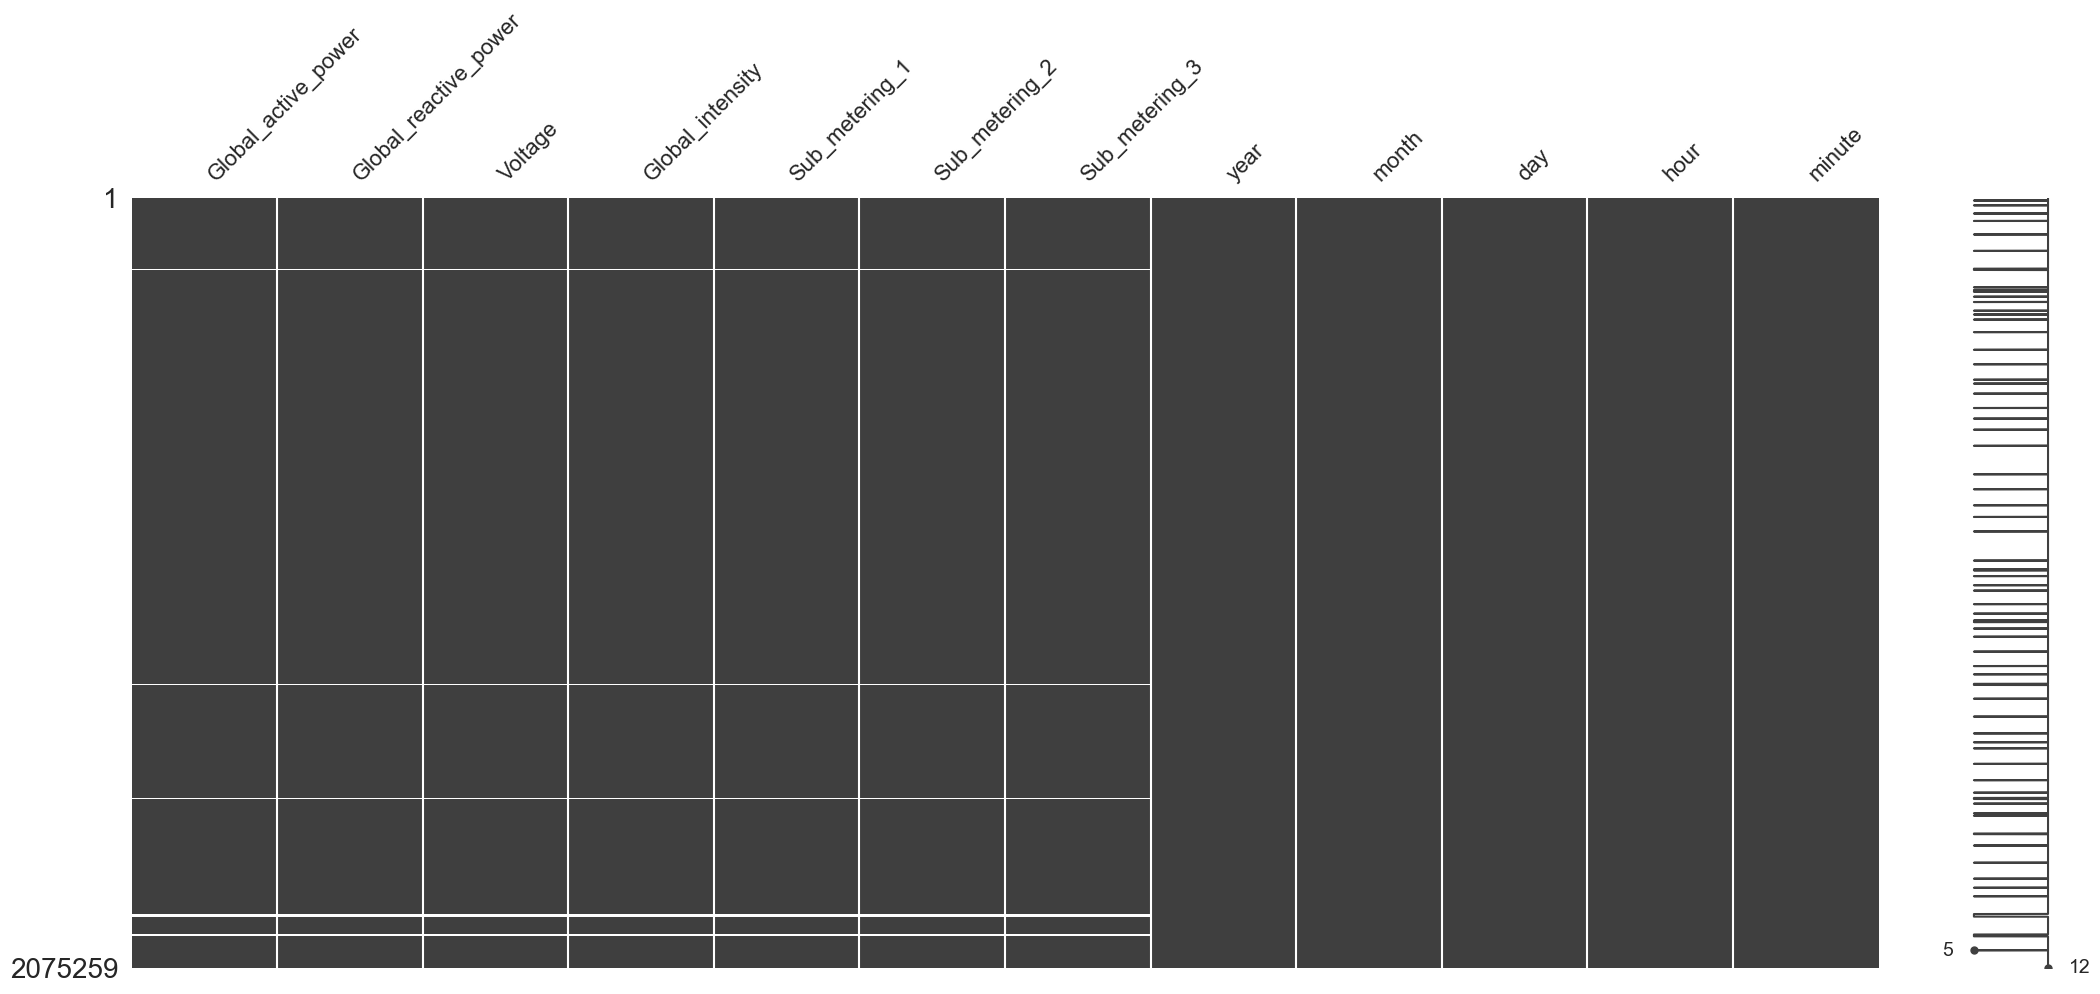

In [48]:
sns.set()
msno.matrix(data);

In [52]:
data = data.dropna()

In [53]:
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
hour                     0
minute                   0
dtype: int64